In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dtr = pd.read_excel('Data_Train (2).xlsx')
dt=pd.read_excel('Data_Test (2).xlsx')

In [3]:
dtr.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
dtr.Name=dtr.Name.str.replace('Wagon R','WagonR')
dt.Name=dt.Name.str.replace('Wagon R','WagonR')
dtr = dtr[dtr['Name'] != 'Ambassador Classic Nova Diesel']
dtr = dtr[dtr['Name'] != 'Lamborghini Gallardo Coupe']
dtr = dtr[dtr['Name'] != 'Force One LX 4x4']
dtr = dtr[dtr['Name'] != 'Force One LX ABS 7 Seating']
dtr = dtr[dtr['Name'] != 'Smart Fortwo CDI AT']

In [5]:
dtr['Name']=dtr['Name'].str.split(n=2)
dt['Name']=dt['Name'].str.split(n=2)
dt.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,"[Maruti, Alto, K10 LXI CNG]",Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,"[Maruti, Alto, 800 2016-2019 LXI]",Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,"[Toyota, Innova, Crysta Touring Sport 2.4 MT]",Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,"[Toyota, Etios, Liva GD]",Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,"[Hyundai, i20, Magna]",Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [6]:
dtr.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,"[Maruti, WagonR, LXI CNG]",Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,"[Hyundai, Creta, 1.6 CRDi SX Option]",Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,"[Honda, Jazz, V]",Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,"[Maruti, Ertiga, VDI]",Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,"[Audi, A4, New 2.0 TDI Multitronic]",Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
dt[['Name','Brand','Model']] = pd.DataFrame(dt.Name.values.tolist(), index= dt.index)

In [8]:
dtr[['Name','Brand','Model']] = pd.DataFrame(dtr.Name.values.tolist(), index= dtr.index)

In [9]:
dtr

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,WagonR,LXI CNG
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Creta,1.6 CRDi SX Option
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Jazz,V
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Ertiga,VDI
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,A4,New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,Swift,VDI
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,Xcent,1.1 CRDi S
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,Xylo,D4 BSIV
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,WagonR,VXI


In [10]:
dtr=dtr[['Name','Brand','Model','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','Price']]
dt=dt[['Name','Brand','Model','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']]

In [11]:
dtr.head()

,Name,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,WagonR,LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Creta,1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Jazz,V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Ertiga,VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,A4,New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [12]:
dtr.duplicated().sum(), dtr.duplicated().sum()

(0, 0)

In [13]:
dtr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6013 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6013 non-null   object 
 1   Brand              6013 non-null   object 
 2   Model              6013 non-null   object 
 3   Location           6013 non-null   object 
 4   Year               6013 non-null   int64  
 5   Kilometers_Driven  6013 non-null   int64  
 6   Fuel_Type          6013 non-null   object 
 7   Transmission       6013 non-null   object 
 8   Owner_Type         6013 non-null   object 
 9   Mileage            6011 non-null   object 
 10  Engine             5977 non-null   object 
 11  Power              5977 non-null   object 
 12  Seats              5971 non-null   float64
 13  Price              6013 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 704.6+ KB


In [14]:
dtr.shape

(6013, 14)

In [15]:
dtr = dtr[dtr['Kilometers_Driven'] < 700000]
dtr = dtr[dtr['Kilometers_Driven'] > 999]
dtr = dtr[dtr['Fuel_Type'] != 'Electric']

In [16]:
dtr.shape

(6006, 14)

In [17]:
df=dtr.append(dt, ignore_index=True, sort=False)

In [18]:
df.head()

,Name,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,WagonR,LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Creta,1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Jazz,V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Ertiga,VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,A4,New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [19]:
df.tail(100)

,Name,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
7140,Mercedes-Benz,A,Class Edition 1,Kochi,2016,27508,Diesel,Automatic,First,20.0 kmpl,2143 CC,107.3 bhp,5.0,NaN
7141,Hyundai,Verna,1.6 SX VTVT (O) AT,Mumbai,2014,28000,Petrol,Automatic,First,17.1 kmpl,1591 CC,121.4 bhp,5.0,NaN
7142,Mercedes-Benz,New,C-Class C 220d Avantgarde Edition C,Mumbai,2014,45000,Diesel,Automatic,First,19.27 kmpl,2143 CC,167.62 bhp,5.0,NaN
7143,BMW,7,Series 740i Sedan,Kochi,2013,86107,Petrol,Automatic,First,8.45 kmpl,2979 CC,321 bhp,5.0,NaN
7144,Land,Rover,Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,Volkswagen,Vento,Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7236,Volkswagen,Polo,GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7237,Nissan,Micra,Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7238,Volkswagen,Polo,GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [20]:
df.isnull().sum()

Name                    0
Brand                   0
Model                   1
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                  46
Seats                  53
Price                1234
dtype: int64

In [21]:
df['Owner_Type']=df['Owner_Type'].replace('First',1).replace('Second',2).replace('Third',3).replace('Fourth & Above',4)
df['Transmission']=(df['Transmission'].replace('Manual',0).replace('Automatic',1))
df['Fuel_Type']=df['Fuel_Type'].replace('Diesel',1).replace('Petrol',2).replace('CNG',3).replace('LPG',4)
df['Engine']=df['Engine'].str.replace('CC','')
df['Mileage']=df['Mileage'].str.replace('km/kg','').str.replace('kmpl','')


In [22]:
df.head()

,Name,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,WagonR,LXI CNG,Mumbai,2010,72000,3,0,1,26.6,998,58.16 bhp,5.0,1.75
1,Hyundai,Creta,1.6 CRDi SX Option,Pune,2015,41000,1,0,1,19.67,1582,126.2 bhp,5.0,12.50
2,Honda,Jazz,V,Chennai,2011,46000,2,0,1,18.2,1199,88.7 bhp,5.0,4.50
3,Maruti,Ertiga,VDI,Chennai,2012,87000,1,0,1,20.77,1248,88.76 bhp,7.0,6.00
4,Audi,A4,New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,1,2,15.2,1968,140.8 bhp,5.0,17.74


In [23]:
df.tail()

,Name,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
7235,Volkswagen,Vento,Diesel Trendline,Hyderabad,2011,89411,1,0,1,20.54,1598,103.6 bhp,5.0,NaN
7236,Volkswagen,Polo,GT TSI,Mumbai,2015,59000,2,1,1,17.21,1197,103.6 bhp,5.0,NaN
7237,Nissan,Micra,Diesel XV,Kolkata,2012,28000,1,0,1,23.08,1461,63.1 bhp,5.0,NaN
7238,Volkswagen,Polo,GT TSI,Pune,2013,52262,2,1,3,17.2,1197,103.6 bhp,5.0,NaN
7239,Mercedes-Benz,E-Class,2009-2013 E 220 CDI Avantgarde,Kochi,2014,72443,1,1,1,10.0,2148,170 bhp,5.0,NaN


In [24]:
df['Power']=df['Power'].str.replace('bhp',' ').str.replace('null','0')

In [25]:
df['Car_Age'] = 2019 - df['Year']

In [26]:
df['Power']=df['Power'].astype('float')
df['Mileage']=df['Mileage'].astype('float')
df['Engine']=df['Engine'].astype('float')
df['Year'] = df['Year'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')

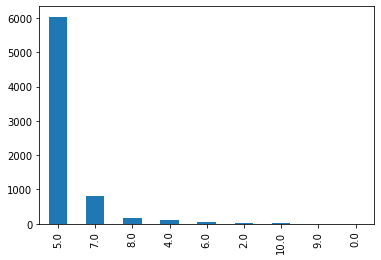

In [27]:
df["Seats"].value_counts().plot(kind="bar")
df['Seats'] = df['Seats'].fillna(5)

In [28]:
df['Engine'] = df.groupby(['Name']).transform(lambda x: x.fillna(x.median()))['Engine']
df['Power'] = df.groupby(['Name']).transform(lambda x: x.fillna(x.median()))['Power']

In [29]:
df.groupby(['Name']).Engine.mean()

Name
Audi             2245.452632
BMW              2320.919614
Bentley          5998.000000
Chevrolet        1370.125828
Datsun           1010.235294
Fiat             1271.263158
Ford             1583.575499
Hindustan        1995.000000
Honda            1503.144011
Hyundai          1305.950000
ISUZU            2499.000000
Isuzu            2999.000000
Jaguar           2571.750000
Jeep             1894.105263
Land             2455.731343
Mahindra         2126.796970
Maruti           1147.593620
Mercedes-Benz    2356.773684
Mini             1758.645161
Mitsubishi       2542.027778
Nissan           1492.837607
OpelCorsa        1389.000000
Porsche          3452.684211
Renault          1321.235294
Skoda            1781.243781
Tata             1331.640351
Toyota           2303.199605
Volkswagen       1438.356568
Volvo            2175.607143
Name: Engine, dtype: float64

In [30]:
df.isnull().sum()

Name                    0
Brand                   0
Model                   1
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
Car_Age                 0
dtype: int64

In [31]:
df=df.drop(['Model'], axis=1)

In [32]:
df.head()

,Name,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti,WagonR,Mumbai,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75,9
1,Hyundai,Creta,Pune,2015,41000,1,0,1,19.67,1582.0,126.20,5.0,12.50,4
2,Honda,Jazz,Chennai,2011,46000,2,0,1,18.20,1199.0,88.70,5.0,4.50,8
3,Maruti,Ertiga,Chennai,2012,87000,1,0,1,20.77,1248.0,88.76,7.0,6.00,7
4,Audi,A4,Coimbatore,2013,40670,1,1,2,15.20,1968.0,140.80,5.0,17.74,6


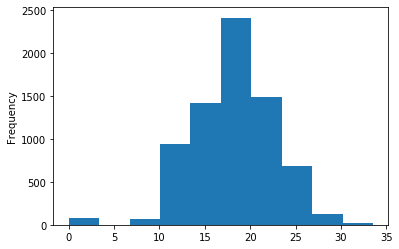

In [33]:
df['Mileage'].plot(kind='hist')

In [34]:
df1=df[df.Name.str.contains('Maruti')]

In [35]:
df1=df1[df1.Kilometers_Driven==65000]
df1=df1[df1.Engine==1248.0]

In [36]:
df1

,Name,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
664,Maruti,Ritz,Pune,2015,65000,1,0,2,23.20,1248.0,73.94,5.0,3.27,4
2381,Maruti,Ertiga,Delhi,2017,65000,1,0,1,25.47,1248.0,88.50,7.0,7.65,2
3026,Maruti,Ritz,Jaipur,2013,65000,1,0,1,23.20,1248.0,73.94,5.0,3.75,6
3669,Maruti,Swift,Ahmedabad,2012,65000,1,0,1,22.90,1248.0,74.00,5.0,3.90,7
3849,Maruti,Swift,Jaipur,2014,65000,1,0,1,19.30,1248.0,73.90,5.0,5.31,5
4393,Maruti,Swift,Chennai,2019,65000,1,1,1,26.59,1248.0,74.00,5.0,6.75,0
5886,Maruti,Swift,Mumbai,2013,65000,1,0,2,19.30,1248.0,73.90,5.0,4.99,6
6997,Maruti,Swift,Chennai,2015,65000,1,0,1,25.20,1248.0,74.00,5.0,NaN,4


In [37]:
def aggregate_functions(df):        
    
    agg_func = {
        'Mileage' : ['mean'],
        'Power' : ['mean'],
        'Engine' : ['mean'] }
    
    agg_df = df.groupby(['Brand']).agg(agg_func)
    agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
    agg_df.reset_index(inplace=True)
    
    agg_df = pd.merge(df, agg_df, on='Brand', how='left')
    
    return agg_df

In [38]:
df = aggregate_functions(df)

In [39]:
df.head(30)

,Name,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_mean,Power_mean,Engine_mean
0,Maruti,WagonR,Mumbai,2010,72000,3,0,1,26.60,998.0,58.16,5.0,1.75,9,20.912373,66.241130,1015.180791
1,Hyundai,Creta,Pune,2015,41000,1,0,1,19.67,1582.0,126.20,5.0,12.50,4,17.673898,121.830508,1572.745763
2,Honda,Jazz,Chennai,2011,46000,2,0,1,18.20,1199.0,88.70,5.0,4.50,8,20.531429,91.622857,1284.328571
3,Maruti,Ertiga,Chennai,2012,87000,1,0,1,20.77,1248.0,88.76,7.0,6.00,7,20.633953,89.712093,1287.860465
4,Audi,A4,Coimbatore,2013,40670,1,1,2,15.20,1968.0,140.80,5.0,17.74,6,16.438111,162.041556,2024.922222
5,Hyundai,EON,Hyderabad,2012,75000,4,0,1,21.10,814.0,55.20,5.0,2.35,7,21.094937,56.003165,825.645570
6,Nissan,Micra,Jaipur,2013,86999,1,0,1,23.08,1461.0,63.10,5.0,3.50,6,20.869556,67.088000,1326.577778
7,Toyota,Innova,Mumbai,2016,36000,1,1,1,11.36,2755.0,171.50,8.0,17.50,3,12.782857,117.199507,2503.261084
8,Volkswagen,Vento,Pune,2013,64430,1,0,1,20.54,1598.0,103.60,5.0,5.20,6,18.426719,104.199141,1552.640625
9,Tata,Indica,Chennai,2012,65932,1,0,2,22.30,1248.0,74.00,5.0,1.95,7,19.626296,62.970741,1333.351852


In [40]:
df.drop(['Name','Brand','Year'], axis=1, inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()
df['Location']=labelencoder_x.fit_transform(df['Location'])

In [42]:
train_df=df[df['Price'].isnull()!=True]
test_df=df[df['Price'].isnull()==True]

In [43]:
train_df['Price'] = np.log1p(train_df['Price'])

D:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
train_df.corr()

,Location,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_mean,Power_mean,Engine_mean
Location,1.000000,-0.071193,0.018926,-0.077315,-0.062251,-0.037348,-0.137714,0.020636,0.055889,-0.058485,-0.073133
Kilometers_Driven,-0.071193,1.000000,-0.154612,0.163613,-0.016966,0.225188,-0.197329,0.474599,-0.209700,0.020716,0.165581
Mileage,0.018926,-0.154612,1.000000,-0.587376,-0.445233,-0.305591,-0.278459,-0.320336,0.772450,-0.454771,-0.586857
Engine,-0.077315,0.163613,-0.587376,1.000000,0.839976,0.398312,0.700056,0.049276,-0.721574,0.831522,0.951280
Power,-0.062251,-0.016966,-0.445233,0.839976,1.000000,0.113637,0.782394,-0.071567,-0.548138,0.935569,0.817208
Seats,-0.037348,0.225188,-0.305591,0.398312,0.113637,1.000000,0.158124,-0.013552,-0.402215,0.120337,0.420762
Price,-0.137714,-0.197329,-0.278459,0.700056,0.782394,0.158124,1.000000,-0.474086,-0.440584,0.797433,0.732245
Car_Age,0.020636,0.474599,-0.320336,0.049276,-0.071567,-0.013552,-0.474086,1.000000,-0.234773,-0.039918,0.025034
Mileage_mean,0.055889,-0.209700,0.772450,-0.721574,-0.548138,-0.402215,-0.440584,-0.234773,1.000000,-0.586910,-0.758143
Power_mean,-0.058485,0.020716,-0.454771,0.831522,0.935569,0.120337,0.797433,-0.039918,-0.586910,1.000000,0.873376


In [45]:
X = train_df.drop(labels=['Price'], axis=1)
y = train_df['Price'].values
X

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Age,Mileage_mean,Power_mean,Engine_mean
0,9,72000,3,0,1,26.60,998.0,58.16,5.0,9,20.912373,66.241130,1015.180791
1,10,41000,1,0,1,19.67,1582.0,126.20,5.0,4,17.673898,121.830508,1572.745763
2,2,46000,2,0,1,18.20,1199.0,88.70,5.0,8,20.531429,91.622857,1284.328571
3,2,87000,1,0,1,20.77,1248.0,88.76,7.0,7,20.633953,89.712093,1287.860465
4,3,40670,1,1,2,15.20,1968.0,140.80,5.0,6,16.438111,162.041556,2024.922222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,4,27365,1,0,1,28.40,1248.0,74.00,5.0,5,21.517847,74.358206,1239.607656
6002,6,100000,1,0,1,24.40,1120.0,71.00,5.0,4,21.768235,77.092353,1167.558824
6003,6,55000,1,0,2,14.00,2498.0,112.00,8.0,7,13.804333,108.270000,2442.433333
6004,8,46000,2,0,1,18.90,998.0,67.10,5.0,6,20.912373,66.241130,1015.180791


In [46]:
train_df.shape, test_df.shape

((6006, 14), (1234, 14))

In [47]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [49]:
x_train

array([[ 0.80562906, -0.54479365,  0.98512032, ..., -1.26789695,
         0.36833059,  0.31865964],
       [-1.22484015,  0.01869503, -0.91062868, ...,  0.95739349,
        -0.71472573, -0.6676987 ],
       [-0.20960555,  1.06836867,  2.88086931, ..., -1.34995787,
        -0.36297766, -0.21017367],
       ...,
       [-0.54801708,  0.09896551, -0.91062868, ..., -1.49302369,
         0.15650483,  1.03383071],
       [ 1.48245212, -0.51680534, -0.91062868, ...,  0.95739349,
        -0.71472573, -0.6676987 ],
       [-0.54801708, -0.34884748, -0.91062868, ...,  0.35189666,
        -0.68893185, -0.47673144]])

In [50]:
y_train

array([1.09861229, 1.75785792, 1.06471074, ..., 1.74919985, 1.91692261,
       1.2669476 ])

In [51]:
y_test

array([1.20896035, 1.46787435, 2.18605128, ..., 1.96850998, 1.01160091,
       2.48073128])

In [52]:
x_test

array([[ 1.14404059, -0.06899235,  0.98512032, ...,  0.67808278,
        -0.37929107, -0.58884376],
       [ 1.48245212,  0.50118553, -0.91062868, ..., -0.83328811,
        -0.12656054,  0.28434374],
       [-1.90166322,  0.01497258, -0.91062868, ..., -0.76245543,
         2.28057866,  1.83110233],
       ...,
       [-0.88642861, -1.00674074,  0.98512032, ...,  1.02829258,
        -0.66160403, -0.79474007],
       [ 0.46721752, -0.38355299,  0.98512032, ..., -0.14441929,
        -0.95327881, -1.09900743],
       [ 1.48245212,  0.15331881, -0.91062868, ..., -0.17462264,
         1.413884  ,  0.66426007]])

In [53]:
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

In [54]:
y_train

array([[1.09861229],
       [1.75785792],
       [1.06471074],
       ...,
       [1.74919985],
       [1.91692261],
       [1.2669476 ]])

In [55]:
train=np.concatenate((y_train, x_train), axis=1)
test=np.concatenate((y_test, x_test), axis=1)

In [56]:
train

array([[ 1.09861229,  0.80562906, -0.54479365, ..., -1.26789695,
         0.36833059,  0.31865964],
       [ 1.75785792, -1.22484015,  0.01869503, ...,  0.95739349,
        -0.71472573, -0.6676987 ],
       [ 1.06471074, -0.20960555,  1.06836867, ..., -1.34995787,
        -0.36297766, -0.21017367],
       ...,
       [ 1.74919985, -0.54801708,  0.09896551, ..., -1.49302369,
         0.15650483,  1.03383071],
       [ 1.91692261,  1.48245212, -0.51680534, ...,  0.95739349,
        -0.71472573, -0.6676987 ],
       [ 1.2669476 , -0.54801708, -0.34884748, ...,  0.35189666,
        -0.68893185, -0.47673144]])

In [57]:
test

array([[ 1.20896035,  1.14404059, -0.06899235, ...,  0.67808278,
        -0.37929107, -0.58884376],
       [ 1.46787435,  1.48245212,  0.50118553, ..., -0.83328811,
        -0.12656054,  0.28434374],
       [ 2.18605128, -1.90166322,  0.01497258, ..., -0.76245543,
         2.28057866,  1.83110233],
       ...,
       [ 1.96850998, -0.88642861, -1.00674074, ...,  1.02829258,
        -0.66160403, -0.79474007],
       [ 1.01160091,  0.46721752, -0.38355299, ..., -0.14441929,
        -0.95327881, -1.09900743],
       [ 2.48073128,  1.48245212,  0.15331881, ..., -0.17462264,
         1.413884  ,  0.66426007]])

In [58]:
a = np.asarray(train)
np.savetxt("train.csv", a, delimiter=",")
b = np.asarray(test)
np.savetxt("test.csv", b, delimiter=",")

LINEAR REGRESSION

In [59]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()

In [60]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(regressor,parameters, cv=3)
grid=grid.fit(x_train, y_train)

In [61]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [62]:
regressor =LinearRegression(fit_intercept=True,normalize=True,copy_X=True)
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [63]:
y_pred=regressor.predict(x_test)

In [64]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [65]:
df

,Actual,Predicted
0,1.208960,1.273898
1,1.467874,1.798299
2,2.186051,3.071746
3,3.959479,3.375332
4,2.346602,2.481398
...,...,...
1797,1.791759,1.902983
1798,3.512142,3.700481
1799,1.968510,1.847515
1800,1.011601,0.898331


In [66]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1862084912981772
Mean Squared Error: 0.06626502494600703
Root Mean Squared Error: 0.25741993890529735


In [67]:
print('The r2 score is',metrics.r2_score(y_test, y_pred))

The r2 score is 0.8830209397750655


In [68]:
test_df=test_df.drop(labels=['Price'], axis=1)

In [69]:
test_df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Age,Mileage_mean,Power_mean,Engine_mean
6006,4,40929,3,0,1,32.26,998.0,58.20,4.0,5,22.697253,52.568681,859.609890
6007,3,54493,2,0,2,24.70,796.0,47.30,5.0,6,22.697253,52.568681,859.609890
6008,9,34000,1,0,1,13.68,2393.0,147.80,7.0,2,12.782857,117.199507,2503.261084
6009,5,139000,1,0,1,23.59,1364.0,0.00,5.0,7,20.702500,60.026000,1417.187500
6010,9,29000,2,0,1,18.50,1197.0,82.85,5.0,5,19.442046,84.517294,1271.214521
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,5,89411,1,0,1,20.54,1598.0,103.60,5.0,8,18.426719,104.199141,1552.640625
7236,9,59000,2,1,1,17.21,1197.0,103.60,5.0,4,18.522753,80.534831,1262.904494
7237,8,28000,1,0,1,23.08,1461.0,63.10,5.0,7,20.869556,67.088000,1326.577778
7238,10,52262,2,1,3,17.20,1197.0,103.60,5.0,6,18.522753,80.534831,1262.904494


In [70]:
test_df=sc_x.fit_transform(test_df)

In [71]:
y_final=regressor.predict(test_df)

In [72]:
#y_final=sc_y.inverse_transform(y_final)

In [73]:
y_final = np.e**y_final - 1

In [74]:
df = pd.DataFrame({'final': y_final.flatten()})

In [75]:
df

,final
0,2.227194
1,2.314600
2,14.596238
3,2.692195
4,4.203343
...,...
1229,4.634057
1230,6.642916
1231,3.522882
1232,4.716856


SVM

In [76]:
from sklearn.svm import SVR
model=SVR()

In [77]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]}
grid = GridSearchCV(model,parameters, cv=3)
grid=grid.fit(x_train, y_train)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [78]:
grid.best_params_

{'C': 3.5}

In [79]:
regressor=SVR(C=4.5)
regressor.fit(x_train,y_train)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=4.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [80]:
y_pred=regressor.predict(x_test)

In [81]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [82]:
df

,Actual,Predicted
0,1.208960,1.257869
1,1.467874,1.621592
2,2.186051,2.481728
3,3.959479,3.787413
4,2.346602,2.388370
...,...,...
1797,1.791759,1.898229
1798,3.512142,3.753873
1799,1.968510,1.864415
1800,1.011601,0.900936


In [83]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.14188372910724545
Mean Squared Error: 0.0442026117821369
Root Mean Squared Error: 0.21024417181490881


In [84]:
print('The r2 score is',metrics.r2_score(y_test, y_pred))

The r2 score is 0.9219681877434565


In [85]:
test_df=sc_x.fit_transform(test_df)

In [86]:
y_final=regressor.predict(test_df)

In [87]:
y_final = np.e**y_final - 1

In [88]:
df = pd.DataFrame({'final': y_final.flatten()})

In [89]:
df

,final
0,3.306765
1,2.422795
2,17.668162
3,3.087740
4,4.021441
...,...
1229,4.401219
1230,5.610268
1231,2.994261
1232,3.928685


RANDOM FOREST

In [90]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [91]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[100,150,200,250,300]}
grid = GridSearchCV(model,parameters, cv=3)
grid=grid.fit(x_train, y_train)

D:\Downloads\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Downloads\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Downloads\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Downloads\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed whe

In [92]:
grid.best_params_

{'n_estimators': 300}

In [93]:
regressor=RandomForestRegressor(n_estimators=300)
regressor.fit(x_train,y_train)

D:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [94]:
y_pred=regressor.predict(x_test)

In [95]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [96]:
df

,Actual,Predicted
0,1.208960,1.225111
1,1.467874,1.472323
2,2.186051,2.248135
3,3.959479,3.897321
4,2.346602,2.267287
...,...,...
1797,1.791759,1.814702
1798,3.512142,3.619958
1799,1.968510,1.785841
1800,1.011601,0.767848


In [97]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11340838420387969
Mean Squared Error: 0.02925062489481496
Root Mean Squared Error: 0.171028140651809


In [98]:
print('The r2 score is',metrics.r2_score(y_test, y_pred))

The r2 score is 0.948363248727733


In [99]:
y_final=regressor.predict(test_df)

In [100]:
y_final = np.e**y_final - 1

In [101]:
df = pd.DataFrame({'final': y_final.flatten()})

In [102]:
df

,final
0,2.807605
1,2.784669
2,17.075437
3,3.216208
4,4.426158
...,...
1229,3.923414
1230,5.588359
1231,2.820984
1232,3.867837
